<a href="https://colab.research.google.com/github/SianC7/LAIDS/blob/main/Sian's_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

Collection:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Set pandas display options for wide output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# List of file paths
data_file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Monday-WorkingHours.pcap_ISCX.csv',
    '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Tuesday-WorkingHours.pcap_ISCX.csv',
    '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Wednesday-workingHours.pcap_ISCX.csv',
    '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Friday-WorkingHours-Morning.pcap_ISCX.csv',
    '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    # '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Pre-Processed Dataset/Monday-WorkingHours.pcap_ISCX.csv',
    # '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Pre-Processed Dataset/Tuesday-WorkingHours.pcap_ISCX.csv',
    # '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Pre-Processed Dataset/Wednesday-workingHours.pcap_ISCX.csv',
    # '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Pre-Processed Dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    # '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Pre-Processed Dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    # '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Pre-Processed Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv',
    # '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Pre-Processed Dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    # '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Pre-Processed Dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',

]
#Set database variables
Mon_df = None
Tue_df = None
Wed_df = None
Thur_df_list = []
Fri_df_list = []

for file_path in data_file_paths: # Loop through the file paths and add the data to a temp df var
  try:
      temp_df = pd.read_csv(file_path, sep=",", comment="#", header=0)
      temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names

      if "Monday" in file_path:
        Mon_df = temp_df
        print(f"Loaded file: {file_path} with {len(temp_df)} rows")
      elif "Tuesday" in file_path:
        Tue_df = temp_df
        print(f"Loaded file: {file_path} with {len(temp_df)} rows")
      elif "Wednesday" in file_path:
        Wed_df = temp_df
        print(f"Loaded file: {file_path} with {len(temp_df)} rows")
      elif "Thursday" in file_path:
        Thur_df_list.append(temp_df)
        print(f"Loaded file: {file_path} with {len(temp_df)} rows")
      elif "Friday" in file_path:
        Fri_df_list.append(temp_df)
        print(f"Loaded file: {file_path} with {len(temp_df)} rows")
  except Exception as e:
      print(f"Error reading file {file_path}: {e}")


#Concat df lists:
Thur_df = pd.concat(Thur_df_list, ignore_index=True) #TEST
Fri_df = pd.concat(Fri_df_list, ignore_index=True)

# #TEST
# print(type(Mon_df))   # should be <class 'pandas.core.frame.DataFrame'>
# print(type(Tue_df))   # same
# print(type(Wed_df))   # same
# print(type(Thur_df))   # same
# print(type(Fri_df))   # same

# --------------------------------------------------------------------------------------------------------------------------------------

day_dfs = [("Monday", Mon_df), ("Tuesday", Tue_df), ("Wednesday", Wed_df), ("Thursday", Thur_df), ("Friday", Fri_df)]

# print("\nInitial samples:")
# for day, df in day_dfs:
#     print(f"\n{day}:")
#     print(f"Number of columns: {df.shape[1]}")
#     print(df.head().to_string())

Loaded file: /content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Monday-WorkingHours.pcap_ISCX.csv with 529918 rows
Loaded file: /content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Tuesday-WorkingHours.pcap_ISCX.csv with 445909 rows
Loaded file: /content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Wednesday-workingHours.pcap_ISCX.csv with 692703 rows
Loaded file: /content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv with 170366 rows
Loaded file: /content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Learning CVE csv files/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv with 288602 rows
Loaded file: /content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/CICIDS2017 Machine Lea

Label Distribution:

In [2]:
# print("\nLabel distribution in each dataframe:")

# total_benign = 0
# total_malicious = 0

# for day, df in day_dfs:
#     print(f"\n--- {day} ---")
#     if df.empty:
#         print("No data for this day.")
#         continue

#     if 'Label' in df.columns:
#         label_counts = df['Label'].value_counts(dropna=False)
#         print(label_counts.to_string())

#         for label, count in label_counts.items():
#             if str(label).strip().upper() == 'BENIGN':
#                 total_benign += count
#             else:
#                 total_malicious += count
#     else:
#         print("⚠️ 'Label' column not found.")

# print("\n--- Total Sample Summary ---")
# print(f"Total BENIGN samples: {total_benign}")
# print(f"Total MALICIOUS samples: {total_malicious}")

Cleaning:

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Set pandas display options for wide output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


for df_name, df in day_dfs:
    # Replace any '-' with NaN for consistent handling
    df.replace('-', np.nan, inplace=True)

    # Replace inf/-inf with NaN (handles both float and int infinities)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Round all float columns to 4 decimal places
    df = df.round(4)

    # Drop columns with a single unique value (constant columns), e.g. all zeros
    #df.drop(columns=[col for col in df.columns if df[col].nunique(dropna=False) == 1 or df[col].eq(0).all()], inplace=True) #FIXX

    # --- Drop 'Flow Bytes/s' and 'Flow Packets/s' columns ---
    df.drop(columns=['Flow Bytes/s', 'Flow Packets/s'], errors='ignore', inplace=True)

    # Convert labels into binary: benign=0, malicious=1
    df['Label'] = df['Label'].apply(lambda x: 0 if 'BENIGN' in str(x).upper() else 1)

    # Drop any rows containing NaN
    df.dropna(inplace=True)



Train/Test Split

In [4]:
from sklearn.model_selection import train_test_split

# print(type(Mon_df))   # should be <class 'pandas.core.frame.DataFrame'>
# print(type(Tue_df))   # same
# print(type(Wed_df))   # same
# print(type(Thur_df))   # same
# print(type(Fri_df))   # same

# --- Train/Test Split ---

# Training data (Monday - benign only)
X_train = Mon_df.drop(columns=['Label']).values
y_train = Mon_df['Label'].values

# Test set contains Malicious and Benign data
test_df = pd.concat([Tue_df, Wed_df, Thur_df, Fri_df], ignore_index=True)
y_test = test_df['Label'].values
X_test = test_df.drop(columns=['Label']).values

# Print dataset sizes
print(f"Training set size: {len(X_train)} samples")
print(f"Training set shape: {X_train.shape}")

print(f"Test set size: {len(X_test)} samples")
print(f"Test set shape: {X_test.shape}")

Training set size: 529918 samples
Training set shape: (529918, 78)
Test set size: 2300825 samples
Test set shape: (2300825, 78)


In [5]:
import numpy as np

print("Any NaNs in X_train?", np.isnan(X_train).any())

# Check for infinite values in X_train and X_test
print("Checking for infinite values before scaling:")

if np.isinf(X_train).any():
    print("Infinite values found in X_train.")
else:
    print("No infinite values found in X_train.")

if np.isinf(X_test).any():
    print("Infinite values found in X_test.")
else:
    print("No infinite values found in X_test.")



Any NaNs in X_train? True
Checking for infinite values before scaling:
No infinite values found in X_train.
No infinite values found in X_test.


Normalise the data:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, RobustScaler # Keep both imports in case user wants to switch

# --- Train/Test Split ---

# Training data (Monday - benign only)
Mon_df.dropna(inplace=True)
X_train = Mon_df.drop(columns=['Label']).values
y_train = Mon_df['Label'].values

# Test set contains Malicious and Benign data
test_df = pd.concat([Tue_df, Wed_df, Thur_df, Fri_df], ignore_index=True)
test_df.dropna(inplace=True)
y_test = test_df['Label'].values
X_test = test_df.drop(columns=['Label']).values

# Print dataset sizes
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

# --- Normalize --- #standardise data features
# Initialize the scaler
# Changed to RobustScaler to handle outliers better
#scaler = RobustScaler()
scaler = MinMaxScaler()

# Apply the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shape of the scaled data to verify
print(f"Shape of X_train_scaled after scaling: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled after scaling: {X_test_scaled.shape}")

print("Any NaNs in X_train_scaled?", np.isnan(X_train_scaled).any())
print("Any infs in X_train_scaled?", np.isinf(X_train_scaled).any())

Training set size: 529481 samples
Test set size: 2298395 samples
Shape of X_train_scaled after scaling: (529481, 78)
Shape of X_test_scaled after scaling: (2298395, 78)
Any NaNs in X_train_scaled? False
Any infs in X_train_scaled? False


#Autoencoder model
An autoencoder model consists of two parts:
- **Encoder**: Responsible for compressing the input data into a lower-dimensional representation of the input data that captures the most important information.
- **Decoder**: Responsible for reconstructing the input data from the latent space representation. The decoder takes the latent space representation as input and produces a reconstructed version of the input data as output. The reconstructed data should be as similar as possible to the original input data.

- Advantages of autoencoders: Can be used to detect anomalies, unsupervised learning models (they do not require labeled data in training), easy to train and implement.
- Disadvantages of autoencoders: computationally expensive to train (especially for large datasets.), they are sensitive to the choice of hyperparameters, difficult to interpret.

Below is a simple autoencoder model with three layers in the encoder and three layers in the decoder. https://levelup.gitconnected.com/build-deep-autoencoders-model-for-anomaly-detection-in-python-a-complete-guide-a7d0ec0e688
https://medium.com/@ndhilani.simbine/how-i-built-a-real-time-anomaly-detection-system-for-enterprise-networks-using-python-and-machine-0078d8a26e84

In [7]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
import numpy as np # Import numpy

# Determine the input dimension from the scaled training data
input_dim = X_train_scaled.shape[1]
print(f"Autoencoder input dimension: {input_dim}")

autoencoder = Sequential([
    Input(shape=(input_dim,)),
    Dense(32, activation='relu'),                             # Encoder layer
    Dense(16, activation='relu'),                             # Encoder bottleneck
    Dense(32, activation='relu'),                             # Decoder layer
    Dense(input_dim, activation='sigmoid')                    # Output layer (same size as input)
])

autoencoder.compile(optimizer='adam', loss='mse')

Autoencoder input dimension: 78


# Train and test the model

Epoch 1/10
6619/6619 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0129 - val_loss: 1.5096e-04
Epoch 2/10
6619/6619 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 1.6033e-04 - val_loss: 4.3229e-05
Epoch 3/10
6619/6619 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 9.8339e-05 - val_loss: 3.8371e-05
Epoch 4/10
6619/6619 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 8.0583e-05 - val_loss: 3.1958e-05
Epoch 5/10
6619/6619 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 6.5456e-05 - val_loss: 2.6405e-05
Epoch 6/10
6619/6619 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 5.4914e-05 - val_loss: 2.3148e-05
Epoch 7/10
6619/6619 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 5.0381e-05 - val_loss: 2.7761e-05
Epoch 8/10
6619/6619 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 4.5620e-05 - val_loss: 2.2648e-05
Epoch 9/10
6619/6619 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 4.3443e-05 - val_loss: 2.0739e-05
Epoch 10/10
6619/6619 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 3.9898e-05 - val_loss: 1.8483e-05
Training time: 219.51 seconds


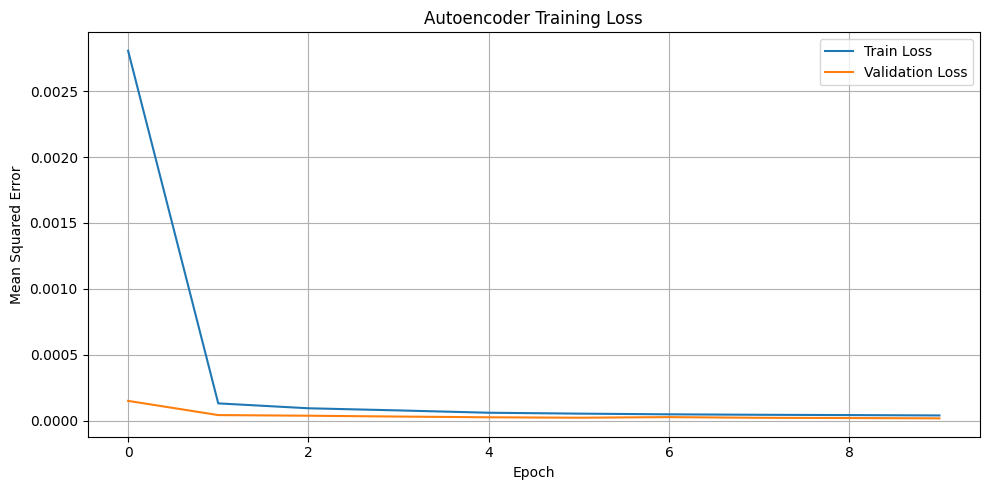

In [8]:
import matplotlib.pyplot as plt
import timeit

# Start timing
start_time = timeit.default_timer()

# Train the autoencoder
history = autoencoder.fit(
    X_train_scaled, X_train_scaled,  # Autoencoders use X_train as both input and target #
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# End timing
end_time = timeit.default_timer()
print(f"Training time: {end_time - start_time:.2f} seconds")

# Plot training and validation loss
plt.figure(figsize=(10, 5))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



#Test the model

In [1]:
# Evaluate the model on the test data
loss = autoencoder.evaluate(X_test_scaled, X_test_scaled) #X_test_scaled, X_test_scaled
mse = autoencoder.evaluate(X_test_scaled, X_test_scaled)

print('Test loss:', loss)
print('Test mean squared error:', mse)

# Calculate the anomaly score (by calculating the reconstruction errors for the test data)
# Calculate the reconstruction errors for the test data
reconstruction_errors = autoencoder.predict(X_test_scaled) - X_test_scaled

# Threshold the reconstruction errors to identify anomalies
anomaly_threshold = 0.1

anomalies = np.where(reconstruction_errors > anomaly_threshold)[0]

# Print the number of anomalies detected
print('Number of anomalies detected:', len(anomalies))

NameError: name 'autoencoder' is not defined

#Reconstruction Error Plot?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# # --- Train the model ---
# autoencoder.fit(X_train, X_train, epochs=20, validation_split=0.2)

# # --- Evaluate the model ---
# loss = autoencoder.evaluate(X_test, X_test)
# print('Test loss (MSE):', loss)

# # --- Predict reconstructed outputs ---
# reconstructed = autoencoder.predict(X_test)

# # --- Calculate per-sample reconstruction error (mean squared error) ---
# reconstruction_errors = np.mean((X_test - reconstructed) ** 2, axis=1)

# --- Visualize reconstruction error ---
plt.figure(figsize=(10, 5))
plt.hist(reconstruction_errors, bins=50, color='skyblue', edgecolor='black')
plt.axvline(np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors), color='red', linestyle='--', label='Anomaly Threshold')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Mean Squared Error per Sample")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Detect anomalies based on threshold ---
threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)
anomalies = np.where(reconstruction_errors > threshold)[0]

print(f"Number of anomalies detected: {len(anomalies)}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pick a sample index to visualize
sample_idx = 0

# Get input and reconstruction
input_sample = X_test[sample_idx]
reconstructed_sample = autoencoder.predict(X_test[sample_idx][np.newaxis, ...])[0]

# Plot input and reconstruction
plt.figure(figsize=(10, 5))
plt.plot(input_sample, label='Input', color='blue')
plt.plot(reconstructed_sample, label='Reconstruction', color='red')

# Plot error band
plt.fill_between(np.arange(len(input_sample)),
                 np.minimum(input_sample, reconstructed_sample),
                 np.maximum(input_sample, reconstructed_sample),
                 color='red', alpha=0.3, label='Error')

plt.legend()
plt.title("Autoencoder Input vs Reconstruction")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()
